## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_combine = pd.merge(mouse_metadata ,study_results, on = 'Mouse ID', how = 'left')

# Display the data table for preview
mouse_combine.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_mice = len(mouse_combine)
total_mice


1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dups = mouse_combine[mouse_combine.duplicated(['Mouse ID', 'Timepoint'])]

dups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dups_all = mouse_combine[mouse_combine.duplicated()]
dups_all



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = mouse_combine.drop_duplicates('Mouse ID')
clean_mouse



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
total_mice = len(clean_mouse)
total_mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_mouse = mouse_combine.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
med_mouse = mouse_combine.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_mouse = mouse_combine.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_mouse = mouse_combine.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_mouse = mouse_combine.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mouse_summary = pd.DataFrame ({ "Mean":mean_mouse,
                               "Median":med_mouse,
                               "Variance":var_mouse,
                               "Standard Deviation":std_mouse,
                               "SEM":sem_mouse
    
})
mouse_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouse_summary.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_mouse = pd.DataFrame(mouse_combine.groupby(["Drug Regimen"]).count()).reset_index()
drug_mousedf = drug_mouse[["Drug Regimen", "Mouse ID"]]
drug_mousedf =drug_mousedf.set_index("Drug Regimen")

Text(0, 0.5, 'Count')

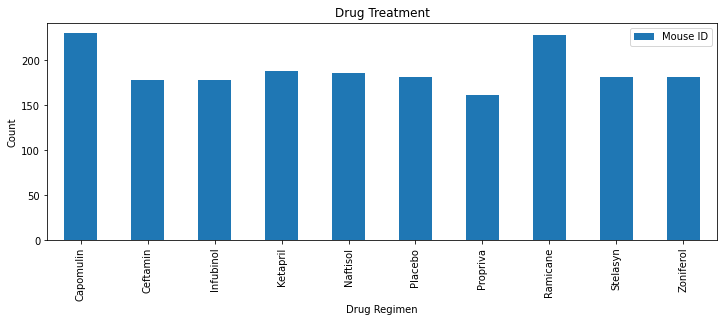

In [10]:
drug_mousedf.plot(kind = "bar", figsize=(12,4))
plt.title("Drug Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

<BarContainer object of 10 artists>

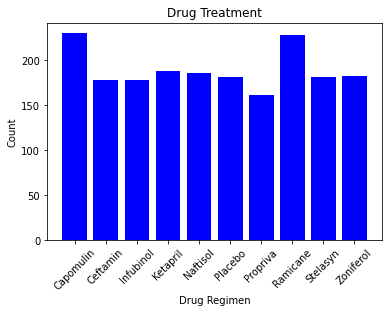

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugs = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
mice = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
x_axis = np.arange(len(mice))

#plt.bar(x_axis, mice, color = "b", align= "center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation= 45)

#plt.ylim(0, max(mice)+0.4)
#plt.xlim(-0.75, len(x_axis)-0.50)


plt.title("Drug Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

plt.bar(x_axis, mice, color = "b", align= "center")


In [12]:
#drug_count = (mouse_combine.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
#drug_count

In [13]:
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, drugs)
#tick_locations

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_mouse = pd.DataFrame(mouse_combine.groupby(["Sex"]).count()).reset_index()
gender_mouse

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


([<matplotlib.patches.Wedge at 0x7f81016d5520>,
 [Text(-0.022900912879184103, 1.1997814585120492, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.013358865846190724, 0.699872517465362, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

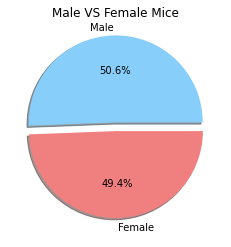

In [15]:
labels =["Male","Female"]
sizes = [958, 935]
colors = ["lightskyblue","lightcoral"]
explode = (0.1,0)
plt.title("Male VS Female Mice")
plt.pie(sizes, labels=labels,colors=colors, autopct="%1.1f%%",explode = explode,shadow =True)


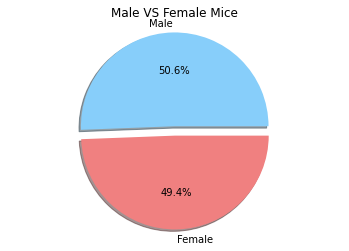

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice = ["Male", "Female"]
mice_count = [958, 935]
colors = ["lightskyblue","lightcoral"]
explode = (0.1,0)

plt.pie(mice_count, explode= explode, labels = mice, colors=colors, autopct="%1.1f%%", shadow=True, startangle=360)

plt.axis("equal")
plt.title("Male VS Female Mice")

plt.savefig("matplotlib-challenge.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time = mouse_combine.sort_values(["Drug Regimen","Mouse ID", "Timepoint"], ascending = False)
last_tp = last_time.loc[last_time["Timepoint"] ==45]
last_tp.head().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
time_merge = pd.merge(mouse_combine, last_tp)
time_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
125,y769,Ceftamin,Female,6,27,45,68.594745,4
126,y865,Ceftamin,Male,23,26,45,64.729837,3
127,z581,Infubinol,Female,24,25,45,62.754451,3
128,z795,Naftisol,Female,13,29,45,65.741070,3


In [38]:
Capomulin_df = mouse_combine.loc[mouse_combine["Drug Regimen"]== "Capomulin",:]
Ramicane_df = mouse_combine.loc[mouse_combine["Drug Regimen"]== "Ramicane",:]
Infubinol_df = mouse_combine.loc[mouse_combine["Drug Regimen"]== "Infubinol",:]
Ceftamin_df = mouse_combine.loc[mouse_combine["Drug Regimen"]== "Ceftamin",:]



In [39]:
# Put treatments into a list for for loop (and later for plot labels)
drug_treats = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

Capomulin_drug = Capomulin_df.groupby("Mouse ID").max()["Timepoint"]
Capomulin_data = pd.DataFrame(Capomulin_drug)
Capomulin_merge = pd.merge(Capomulin_data, mouse_combine, on = ("Mouse ID","Timepoint"), how = "left")



Capomulin_merge.head()   

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [40]:
Capomulin_tums = Capomulin_merge["Tumor Volume (mm3)"]
quartiles = Capomulin_tums.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin Tumors is: {lowerq}")
print(f"The upper quartile of Capomulin Tumors is: {upperq}")
print(f"The interquartile range of Capomulin Tumors is: {iqr}")
print(f"The the median of Capomulin Tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin Tumors is: 32.37735684
The upper quartile of Capomulin Tumors is: 40.1592203
The interquartile range of Capomulin Tumors is: 7.781863460000004
The the median of Capomulin Tumors is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [41]:
#Ramicane
Ramicane_drug = Capomulin_df.groupby("Mouse ID").max()["Timepoint"]
Ramicane_data = pd.DataFrame(Ramicane_drug)
Ramicane_merge = pd.merge(Ramicane_data, mouse_combine, on = ("Mouse ID","Timepoint"), how = "left")
Ramicane_merge.head

<bound method NDFrame.head of    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0      b128         45    Capomulin  Female           9          22   
1      b742         45    Capomulin    Male           7          21   
2      f966         20    Capomulin    Male          16          17   
3      g288         45    Capomulin    Male           3          19   
4      g316         45    Capomulin  Female          22          22   
5      i557         45    Capomulin  Female           1          24   
6      i738         45    Capomulin  Female          23          20   
7      j119         45    Capomulin  Female           7          23   
8      j246         35    Capomulin  Female          21          21   
9      l509         45    Capomulin    Male          17          21   
10     l897         45    Capomulin    Male          17          19   
11     m601         45    Capomulin    Male          22          17   
12     m957         45    Capomulin  Female    

In [42]:
Ramicane_tums = Ramicane_merge["Tumor Volume (mm3)"]
quartiles = Ramicane_tums.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane Tumors is: {lowerq}")
print(f"The upper quartile of Ramicane Tumors is: {upperq}")
print(f"The interquartile range of Ramicane Tumors is: {iqr}")
print(f"The the median of Ramicane Tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane Tumors is: 32.37735684
The upper quartile of Ramicane Tumors is: 40.1592203
The interquartile range of Ramicane Tumors is: 7.781863460000004
The the median of Ramicane Tumors is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [43]:
#Infubinol
Infubinol_drug = Infubinol_df.groupby("Mouse ID").max()["Timepoint"]
Infubinol_data = pd.DataFrame(Infubinol_drug)
Infubinol_merge = pd.merge(Infubinol_data, mouse_combine, on = ("Mouse ID","Timepoint"), how = "left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [44]:
Infubinol_tums = Infubinol_merge["Tumor Volume (mm3)"]
quartiles = Infubinol_tums.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol Tumors is: {lowerq}")
print(f"The upper quartile of Infubinol Tumors is: {upperq}")
print(f"The interquartile range of Infubinol Tumors is: {iqr}")
print(f"The the median of Infubinol Tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol Tumors is: 54.04860769
The upper quartile of Infubinol Tumors is: 65.52574285
The interquartile range of Infubinol Tumors is: 11.477135160000003
The the median of Infubinol Tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [45]:
#Ceftamin
Ceftamin_drug = Ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
Ceftamin_data = pd.DataFrame(Ceftamin_drug)
Ceftamin_merge = pd.merge(Ceftamin_data, mouse_combine, on = ("Mouse ID","Timepoint"), how = "left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [46]:
Ceftamin_tums = Ceftamin_merge["Tumor Volume (mm3)"]
quartiles = Ceftamin_tums.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin Tumors is: {lowerq}")
print(f"The upper quartile of Ceftamin Tumors is: {upperq}")
print(f"The interquartile range of Ceftamin Tumors is: {iqr}")
print(f"The the median of Ceftamin Tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin Tumors is: 48.72207785
The upper quartile of Ceftamin Tumors is: 64.29983003
The interquartile range of Ceftamin Tumors is: 15.577752179999997
The the median of Ceftamin Tumors is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


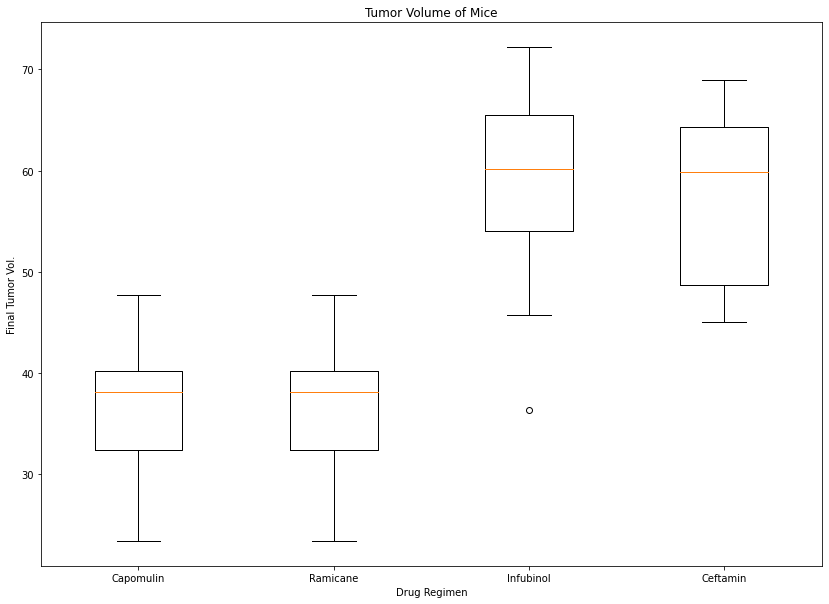

In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_box = [Capomulin_tums, Ramicane_tums,Infubinol_tums,Ceftamin_tums ]
fig1, ax1 = plt.subplots(figsize = (14,10))
ax1.set_title('Tumor Volume of Mice')
ax1.set_ylabel("Final Tumor Vol.")
ax1.set_xlabel("Drug Regimen")

ax1.boxplot(tumor_box, labels = drug_treats)
plt.show()

## Line and Scatter Plots

In [48]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_line = Capomulin_df.loc[Capomulin_df["Mouse ID"]=="t565",:]
mouse_line.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
155,t565,Capomulin,Female,20,17,0,45.000000,0
156,t565,Capomulin,Female,20,17,5,45.895647,0
157,t565,Capomulin,Female,20,17,10,46.749006,0
158,t565,Capomulin,Female,20,17,15,44.440949,0
159,t565,Capomulin,Female,20,17,20,39.070214,0


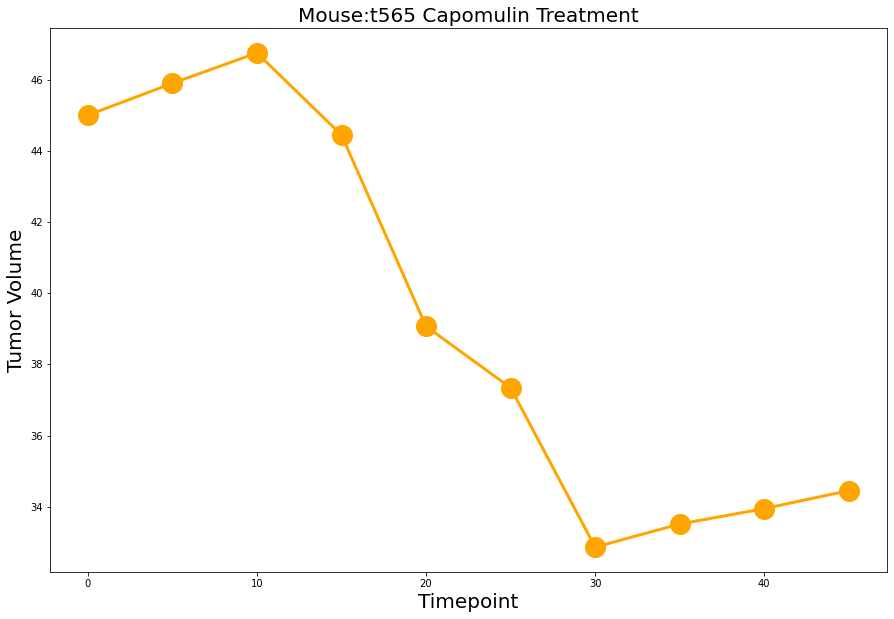

In [54]:
x_axis = mouse_line["Timepoint"]
tumor_vol = mouse_line["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15,10))

plt.plot(x_axis, tumor_vol,linewidth= 3, markersize=20,marker = "o", color ="orange", label = "drug_treats")
plt.title("Mouse:t565 Capomulin Treatment",fontsize = 20)
plt.xlabel("Timepoint", fontsize = 20)
plt.ylabel("Tumor Volume", fontsize = 20)

plt.show()




Text(0, 0.5, 'Tumor Volume')

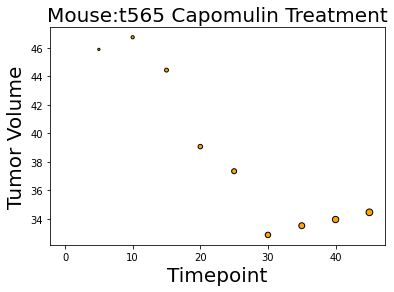

In [56]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(x_axis,tumor_vol, marker="o",facecolors="orange", edgecolors= "black", s=x_axis)
plt.title("Mouse:t565 Capomulin Treatment",fontsize = 20)
plt.xlabel("Timepoint", fontsize = 20)
plt.ylabel("Tumor Volume", fontsize = 20)

## Correlation and Regression

In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
